# Stack Overflow

## Introduction 

In this assignment, we will use some posts on Stack Overflow during the year of 2015 and measure the similarity of  users by looking at their answers' score. In order to get a full grade, do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and is due on **February 2** at **7pm**.

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/2-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs). You might need to install the *requests* library and an easy way to do so is by using the command [pip](https://docs.python.org/3/installing/index.html).

In [8]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)
type(response)

<Response [200]>


requests.models.Response

Now, object *response* contains the raw text of posts from the first day of 2015. 
Note that all dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [9]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":267,"user_id":3210431,"user_type":"registered","accept_rate":76,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"https://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":248,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"https://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":971,"answer_count":1,"score":1,"last_activity_dat

It is not possible to read the raw response. Instead, we need to decode the raw response as **JSON** and use the `json` library to print it. JavaScript Object Notation (JSON) is a standard text-based format for representing structured data based on JavaScript object syntax, which is commonly used for representing and transmitting data on web sites. More documentation on json objects can be found [here](https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON) 

In [10]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=2))

{
  "items": [
    {
      "tags": [
        "php",
        "mysql",
        "arrays",
        "mysqli"
      ],
      "owner": {
        "reputation": 267,
        "user_id": 3210431,
        "user_type": "registered",
        "accept_rate": 76,
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
        "display_name": "salep",
        "link": "https://stackoverflow.com/users/3210431/salep"
      },
      "is_answered": true,
      "view_count": 248,
      "accepted_answer_id": 27727478,
      "answer_count": 2,
      "score": 0,
      "last_activity_date": 1420071815,
      "creation_date": 1420070458,
      "question_id": 27727385,
      "link": "https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
      "title": "Inserting multiple records into MySQL from an array"
    },
    {
      "tags": [
        "apache-pig"
      ],
      "owner": {
        "reputation": 6,
        "user_id": 868779,
        "user_type": "r

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates and whether the question was answered. Your solution should be in the form **(creation_date,is_answered)**. Notice that a JSON object is basically a dictionary. **(2 pts)**

In [11]:
# def print_creation_dates_is_answered_json(response):
#     """
#     Prints the creation_date of all the questions in the response.
    
#     Parameters:
#         response: Response object
#     """
#     format = '%Y-%m-%d %H:%M:%S'
    
#     json_response = response.json()
#     result = []
#     for i in range(len(json_response['items'])):
    
#         result = json_response['items'][i]['creation_date']
#         answer = json_response['items'][i]['is_answered']
#         result = (datetime.utcfromtimestamp(result).strftime(format), answer)
#         print(result)
import time

def print_creation_dates_is_answered_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    format = '%m-%d-%Y %H:%M:%S'
    
    for i in response["items"]:
        print((time.strftime(format,time.gmtime(i["creation_date"])),i["is_answered"]))  

Write the code that calls the ```print_creation_dates_is_answered_json()``` function to print out **all** the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). This means that after getting a request, you will need to wait for some seconds before making a new request. If you do not do that, stack exchange will block you from making any new requests. **(1 pts)**

In [12]:
# json_response = response.json()
# ask = 0
# page = 0
# while json_response['has_more']:
#     page += 1
#     if ask == 30:
#         ask = 0
#         time.sleep(5)
#     response = requests.get("https://api.stackexchange.com/2.2/questions?page="+ str(page) +
#                         "&pagesize=100" + "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
#                         "&order=asc&sort=creation&site=stackoverflow")
#     print_creation_dates_is_answered_json(response)
#     ask += 1
#     json_response = response.json()
page = 1

while json_response["has_more"]:
    time.sleep(2)
    response = requests.get("https://api.stackexchange.com/2.2/questions?page="+str(page)+"&pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
    json_response = response.json()
    print_creation_dates_is_answered_json(json_response)
    page +=1


('01-01-2015 00:00:58', True)
('01-01-2015 00:01:43', False)
('01-01-2015 00:02:32', True)
('01-01-2015 00:02:57', True)
('01-01-2015 00:03:31', True)
('01-01-2015 00:04:01', False)
('01-01-2015 00:05:03', False)
('01-01-2015 00:05:27', True)
('01-01-2015 00:05:34', True)
('01-01-2015 00:06:17', False)
('01-01-2015 00:06:41', True)
('01-01-2015 00:07:28', True)
('01-01-2015 00:07:39', True)
('01-01-2015 00:07:46', False)
('01-01-2015 00:09:28', True)
('01-01-2015 00:10:05', False)
('01-01-2015 00:10:29', True)
('01-01-2015 00:11:43', True)
('01-01-2015 00:12:02', True)
('01-01-2015 00:12:55', True)
('01-01-2015 00:13:04', False)
('01-01-2015 00:13:32', False)
('01-01-2015 00:13:50', False)
('01-01-2015 00:15:40', True)
('01-01-2015 00:17:11', True)
('01-01-2015 00:18:50', True)
('01-01-2015 00:22:16', False)
('01-01-2015 00:23:14', True)
('01-01-2015 00:23:50', True)
('01-01-2015 00:24:28', False)
('01-01-2015 00:25:07', True)
('01-01-2015 00:25:29', True)
('01-01-2015 00:25:39', True)

('01-01-2015 04:50:41', True)
('01-01-2015 04:50:51', True)
('01-01-2015 04:51:00', True)
('01-01-2015 04:51:19', True)
('01-01-2015 04:51:51', True)
('01-01-2015 04:53:10', True)
('01-01-2015 04:54:17', True)
('01-01-2015 04:54:47', True)
('01-01-2015 04:56:06', True)
('01-01-2015 04:56:08', True)
('01-01-2015 04:57:05', False)
('01-01-2015 04:57:34', False)
('01-01-2015 04:58:30', True)
('01-01-2015 04:58:51', True)
('01-01-2015 04:59:31', True)
('01-01-2015 05:00:16', True)
('01-01-2015 05:01:19', True)
('01-01-2015 05:01:28', True)
('01-01-2015 05:01:48', True)
('01-01-2015 05:02:19', True)
('01-01-2015 05:06:24', True)
('01-01-2015 05:07:05', False)
('01-01-2015 05:08:42', False)
('01-01-2015 05:09:25', False)
('01-01-2015 05:12:54', False)
('01-01-2015 05:13:25', True)
('01-01-2015 05:14:00', False)
('01-01-2015 05:15:31', True)
('01-01-2015 05:16:31', True)
('01-01-2015 05:17:22', False)
('01-01-2015 05:19:33', False)
('01-01-2015 05:19:52', True)
('01-01-2015 05:20:34', True)
(

('01-01-2015 08:33:55', True)
('01-01-2015 08:35:13', True)
('01-01-2015 08:36:50', True)
('01-01-2015 08:37:03', True)
('01-01-2015 08:37:49', False)
('01-01-2015 08:38:21', False)
('01-01-2015 08:38:50', True)
('01-01-2015 08:39:25', False)
('01-01-2015 08:39:31', False)
('01-01-2015 08:39:43', True)
('01-01-2015 08:39:49', True)
('01-01-2015 08:40:19', False)
('01-01-2015 08:40:47', False)
('01-01-2015 08:41:06', False)
('01-01-2015 08:41:36', True)
('01-01-2015 08:41:55', True)
('01-01-2015 08:42:04', False)
('01-01-2015 08:42:06', False)
('01-01-2015 08:42:17', False)
('01-01-2015 08:43:20', True)
('01-01-2015 08:43:50', True)
('01-01-2015 08:45:00', True)
('01-01-2015 08:45:05', False)
('01-01-2015 08:45:36', True)
('01-01-2015 08:45:48', True)
('01-01-2015 08:47:07', True)
('01-01-2015 08:47:50', False)
('01-01-2015 08:48:26', False)
('01-01-2015 08:50:01', False)
('01-01-2015 08:50:57', True)
('01-01-2015 08:51:14', False)
('01-01-2015 08:52:25', True)
('01-01-2015 08:52:28', F

('01-01-2015 11:27:49', True)
('01-01-2015 11:28:18', True)
('01-01-2015 11:30:07', True)
('01-01-2015 11:30:47', True)
('01-01-2015 11:31:26', True)
('01-01-2015 11:31:56', True)
('01-01-2015 11:32:01', True)
('01-01-2015 11:32:09', False)
('01-01-2015 11:32:13', True)
('01-01-2015 11:33:12', False)
('01-01-2015 11:33:28', False)
('01-01-2015 11:34:15', True)
('01-01-2015 11:34:40', False)
('01-01-2015 11:34:55', True)
('01-01-2015 11:35:01', True)
('01-01-2015 11:35:06', False)
('01-01-2015 11:36:07', False)
('01-01-2015 11:36:11', True)
('01-01-2015 11:36:28', False)
('01-01-2015 11:36:58', False)
('01-01-2015 11:37:20', True)
('01-01-2015 11:37:20', True)
('01-01-2015 11:37:39', True)
('01-01-2015 11:37:41', True)
('01-01-2015 11:38:23', False)
('01-01-2015 11:38:27', False)
('01-01-2015 11:41:44', True)
('01-01-2015 11:41:57', True)
('01-01-2015 11:42:17', True)
('01-01-2015 11:42:55', True)
('01-01-2015 11:43:16', False)
('01-01-2015 11:43:47', False)
('01-01-2015 11:43:48', True

('01-01-2015 13:40:19', True)
('01-01-2015 13:40:30', False)
('01-01-2015 13:41:20', True)
('01-01-2015 13:42:10', True)
('01-01-2015 13:42:12', False)
('01-01-2015 13:42:47', True)
('01-01-2015 13:44:43', True)
('01-01-2015 13:45:12', True)
('01-01-2015 13:45:46', False)
('01-01-2015 13:45:48', True)
('01-01-2015 13:46:11', False)
('01-01-2015 13:47:35', True)
('01-01-2015 13:47:35', True)
('01-01-2015 13:47:44', True)
('01-01-2015 13:47:56', True)
('01-01-2015 13:47:57', False)
('01-01-2015 13:48:05', False)
('01-01-2015 13:48:35', True)
('01-01-2015 13:48:46', True)
('01-01-2015 13:48:57', True)
('01-01-2015 13:49:09', True)
('01-01-2015 13:50:28', True)
('01-01-2015 13:50:42', True)
('01-01-2015 13:50:54', True)
('01-01-2015 13:50:57', True)
('01-01-2015 13:51:07', True)
('01-01-2015 13:51:13', True)
('01-01-2015 13:52:13', True)
('01-01-2015 13:52:15', True)
('01-01-2015 13:52:29', True)
('01-01-2015 13:53:21', True)
('01-01-2015 13:53:27', False)
('01-01-2015 13:53:46', True)
('0

('01-01-2015 15:51:49', True)
('01-01-2015 15:52:20', False)
('01-01-2015 15:52:58', False)
('01-01-2015 15:53:05', True)
('01-01-2015 15:53:06', False)
('01-01-2015 15:53:19', True)
('01-01-2015 15:54:04', False)
('01-01-2015 15:54:23', True)
('01-01-2015 15:55:40', True)
('01-01-2015 15:56:54', False)
('01-01-2015 15:57:38', True)
('01-01-2015 15:57:39', True)
('01-01-2015 15:57:41', True)
('01-01-2015 15:58:20', False)
('01-01-2015 15:58:34', True)
('01-01-2015 15:58:35', True)
('01-01-2015 15:58:45', True)
('01-01-2015 15:59:00', False)
('01-01-2015 15:59:16', False)
('01-01-2015 15:59:30', True)
('01-01-2015 15:59:44', True)
('01-01-2015 15:59:49', True)
('01-01-2015 16:00:18', True)
('01-01-2015 16:00:42', True)
('01-01-2015 16:00:46', True)
('01-01-2015 16:01:47', True)
('01-01-2015 16:02:47', True)
('01-01-2015 16:02:58', True)
('01-01-2015 16:03:01', True)
('01-01-2015 16:03:12', True)
('01-01-2015 16:04:14', True)
('01-01-2015 16:04:31', False)
('01-01-2015 16:04:56', True)
(

('01-01-2015 18:01:09', False)
('01-01-2015 18:01:27', False)
('01-01-2015 18:01:31', False)
('01-01-2015 18:01:43', True)
('01-01-2015 18:02:04', True)
('01-01-2015 18:02:11', True)
('01-01-2015 18:02:18', True)
('01-01-2015 18:03:05', True)
('01-01-2015 18:03:55', False)
('01-01-2015 18:04:23', True)
('01-01-2015 18:04:45', False)
('01-01-2015 18:04:50', True)
('01-01-2015 18:05:41', True)
('01-01-2015 18:05:53', False)
('01-01-2015 18:06:01', False)
('01-01-2015 18:06:52', False)
('01-01-2015 18:06:56', True)
('01-01-2015 18:07:27', True)
('01-01-2015 18:07:54', False)
('01-01-2015 18:08:09', True)
('01-01-2015 18:08:12', True)
('01-01-2015 18:08:21', True)
('01-01-2015 18:08:22', True)
('01-01-2015 18:08:28', False)
('01-01-2015 18:09:24', False)
('01-01-2015 18:11:13', True)
('01-01-2015 18:12:05', False)
('01-01-2015 18:12:07', False)
('01-01-2015 18:12:44', True)
('01-01-2015 18:13:48', True)
('01-01-2015 18:14:49', True)
('01-01-2015 18:14:55', True)
('01-01-2015 18:15:16', Tru

('01-01-2015 20:00:46', True)
('01-01-2015 20:01:51', True)
('01-01-2015 20:01:53', True)
('01-01-2015 20:02:09', True)
('01-01-2015 20:02:47', False)
('01-01-2015 20:02:51', True)
('01-01-2015 20:03:33', False)
('01-01-2015 20:04:20', False)
('01-01-2015 20:04:30', True)
('01-01-2015 20:04:46', False)
('01-01-2015 20:04:57', True)
('01-01-2015 20:05:49', True)
('01-01-2015 20:06:01', True)
('01-01-2015 20:06:16', True)
('01-01-2015 20:06:20', True)
('01-01-2015 20:06:22', False)
('01-01-2015 20:06:28', True)
('01-01-2015 20:06:37', False)
('01-01-2015 20:07:02', True)
('01-01-2015 20:07:17', True)
('01-01-2015 20:08:08', True)
('01-01-2015 20:08:28', True)
('01-01-2015 20:09:08', True)
('01-01-2015 20:09:10', True)
('01-01-2015 20:09:20', True)
('01-01-2015 20:09:47', True)
('01-01-2015 20:10:34', True)
('01-01-2015 20:11:17', True)
('01-01-2015 20:11:53', True)
('01-01-2015 20:12:08', True)
('01-01-2015 20:12:18', True)
('01-01-2015 20:12:37', True)
('01-01-2015 20:12:40', True)
('01

('01-01-2015 22:05:13', True)
('01-01-2015 22:06:07', True)
('01-01-2015 22:06:15', True)
('01-01-2015 22:06:40', True)
('01-01-2015 22:06:45', True)
('01-01-2015 22:07:19', True)
('01-01-2015 22:07:59', True)
('01-01-2015 22:09:04', False)
('01-01-2015 22:09:14', True)
('01-01-2015 22:09:32', True)
('01-01-2015 22:09:47', True)
('01-01-2015 22:10:23', True)
('01-01-2015 22:10:46', False)
('01-01-2015 22:12:17', False)
('01-01-2015 22:12:34', True)
('01-01-2015 22:12:49', True)
('01-01-2015 22:13:30', True)
('01-01-2015 22:14:13', True)
('01-01-2015 22:14:32', True)
('01-01-2015 22:14:57', True)
('01-01-2015 22:15:22', True)
('01-01-2015 22:15:24', False)
('01-01-2015 22:16:01', True)
('01-01-2015 22:16:39', True)
('01-01-2015 22:16:43', True)
('01-01-2015 22:17:09', True)
('01-01-2015 22:17:58', False)
('01-01-2015 22:18:25', True)
('01-01-2015 22:18:32', True)
('01-01-2015 22:18:38', True)
('01-01-2015 22:18:42', True)
('01-01-2015 22:20:04', True)
('01-01-2015 22:20:05', True)
('01-

Due to time constraints, we have downloaded the [data dump](https://drive.google.com/a/bu.edu/file/d/0BzeSDLWpnNHxaEd5XzhIZ2tJMlU/view?usp=sharing) for Stack Overflow's posts in 2015. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. Your solution should work with the whole dataset.

Do not commit the data file to your github. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions and answers posted in 2015. Questions are posts with `PostTypeId=1` and answers are posts with `PostTypeId=2`. Then: 
1. Make a `pandas DataFrame` with the following 9 columns: `Id`, `CreationDate`, `OwnerUserId`, the first tag in `Tags`, `Score`, `ViewCount`,`AnswerCount`,`ParentId`,`Type`. Note that the first 5 columns are common for both questions and answers, the following 2 columns are only identified in questions and the next column in answers. Finally column `Type` is used show whether the row of the data frame corresponds to a question or answer. You can assign 'Q' for question and 'A' for answer to this column. Also, if you do not have a value for a column, for instance an answer does not have a view count, then simply add None as a value.   
2. Print out the time required to parse the questions (data file).
3. Print out the DataFrame.
4. Do not clear the output. 
**(3 pts)**

Some hints/library you might find useful are the following:
1. One library you can use to parse the large .xml file is the `xml.etree.ElementTree` library. More documentation can be found [here](https://docs.python.org/2/library/xml.etree.elementtree.html).
2. Due to the required parsing time, it is strongly recommended that you write the parsed data in another file on the disk. Thus, even if something goes wrong you will always have these data to work with, which will give you partial credit.
3. Before traversing the whole dataset, play with a small subset first in order to construct your solution fast.


In [14]:
# -*- coding: utf-8 -*-
# File imports
try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
from lxml import objectify
import csv
import time

start = time.clock()
file = open("C:\software\stackoverflow-posts-2015.xml","r", encoding='UTF-8')

tree = ET.parse(file)
root = tree.getroot()
end = time.clock()
print("Parsing the xml file needs: ", end - start , "s")

Parsing the xml file needs:  203.081323 s


In [15]:
df_list = []

for child in root.findall("row"):
    dic = {}
    PostTypeId = child.get('PostTypeId')
    
    Type = ""
    if PostTypeId == None:
        break
    elif PostTypeId == '1':
        dic['Type'] = "Q"
    elif PostTypeId == '2':
        dic['Type'] = "A"

    dic['Id'] = child.get('Id')
    dic['CreationDate'] = child.get('CreationDate')
    dic['OwnerUserId'] = child.get('OwnerUserId')
    Tags = str(child.get('Tags'))
    if Tags != "None":
        T = Tags.split('>')
        dic['Tags'] = T[0]+'>'
    
    dic['Score'] = child.get('Score')
    dic['ViewCount'] = child.get('ViewCount')
    dic['AnswerCount'] = child.get('AnswerCount')
    dic['ParentId'] = child.get('ParentId') 
    
    df_list.append(dic)
    
df = pd.DataFrame(data = df_list, columns = ['Id', 'CreationDate', 'OwnerUserId', 'Tags', 'Score', 'ViewCount', 'AnswerCount', 'ParentId', 'Type'])
# fw.close()

df.to_csv('dataframe.csv')
df 


    
    

,Id,CreationDate,OwnerUserId,Tags,Score,ViewCount,AnswerCount,ParentId,Type
0,27727381,2015-01-01T00:00:27.040,1971096,NaN,6,None,None,2845211,A
1,27727382,2015-01-01T00:00:31.240,2410359,NaN,0,None,None,27727116,A
2,27727384,2015-01-01T00:00:50.550,1366219,NaN,1,None,None,27725620,A
3,27727385,2015-01-01T00:00:58.253,3210431,<php>,0,184,2,None,Q
4,27727387,2015-01-01T00:01:43.597,3886175,NaN,0,None,None,11962138,A
5,27727388,2015-01-01T00:01:43.673,868779,<apache-pig>,1,180,1,None,Q
6,27727389,2015-01-01T00:02:02.050,3925941,NaN,3,None,None,27725803,A
7,27727390,2015-01-01T00:02:30.233,1004312,NaN,2,None,None,27726352,A
8,27727391,2015-01-01T00:02:32.123,4372672,<ios>,1,127,1,None,Q
9,27727393,2015-01-01T00:02:57.983,2482149,<sql-server>,3,62,1,None,Q


-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the highest total answer scores. That is, you need to compute for each user the sum of the answer scores that he has received, for all answers that he has provided.

Compare the users based on the types of questions they answer. We will categorize a question by its first tag, so eventually the features of the user will comprise the first tag of each question that he has answered. You may choose to implement any one of the similarity/distance measures we discussed in class. **(2pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [2]:
import pandas as pd
from pandas import *

df_csv=open("dataframe.csv")
df = pd.read_csv('dataframe.csv')

dfcols = ['Id', 'CreationDate', 'OwnerUserId', 'Tags', 'Score', 'ViewCount', 'AnswerCount', 'ParentId', 'Type']


grouped = df.groupby('Type')
for Type, data in grouped:
    if Type == 'A':
        Ans_df = data[['OwnerUserId', 'Score', 'ParentId']]
    elif Type == 'Q':
        Que_df = data[['Id', 'Tags']]


grouped_A = Ans_df.groupby('OwnerUserId')

parent_A = grouped_A['ParentId'].apply(list)

Sum_df = grouped_A['Score'].sum()

all_df = pd.concat([Sum_df, parent_A], axis=1)

sort_df = all_df.sort_values(by=['Score'], ascending = False)

first_100 = sort_df.head(n=100)

first_100


,Score,ParentId
OwnerUserId,,
22656.0,9614,"[27729534.0, 27729607.0, 27730282.0, 27733898...."
1144035.0,9259,"[27731334.0, 27730046.0, 27731880.0, 27733954...."
100297.0,9217,"[27730041.0, 27730580.0, 27731449.0, 27732448...."
3732271.0,7548,"[27727904.0, 27730389.0, 27730600.0, 27744702...."
1221571.0,7125,"[27729388.0, 27729851.0, 27730418.0, 27730895...."
157247.0,6095,"[27729148.0, 27730831.0, 27730904.0, 27731159...."
335858.0,6019,"[27732131.0, 27732293.0, 27732353.0, 27732622...."
548225.0,5385,"[27727484.0, 27729920.0, 27730038.0, 27730086...."
2069064.0,5102,"[27742271.0, 27745127.0, 27748290.0, 27772798...."


In [3]:
users_tag_dic = {}
for user in first_100.index:
    key = ''
    user_toint = int(user)
    key = str(user_toint)

    users_tag_dic[key] = []
    for user_Q_id in first_100.loc[user].values[1]:
        for tags in Que_df[Que_df.Id == user_Q_id].values.tolist():
            users_tag_dic[key].append(tags[1])

print(users_tag_dic)


{'22656': ['<c#>', '<java>', '<c#>', '<java>', '<java>', '<c#>', '<c#>', '<java>', '<java>', '<c#>', '<java>', '<java>', '<c#>', '<java>', '<java>', '<java>', '<c#>', '<c#>', '<java>', '<c#>', '<java>', '<java>', '<c#>', '<c#>', '<c#>', '<java>', '<c#>', '<java>', '<c#>', '<c#>', '<c#>', '<java>', '<c#>', '<java>', '<c#>', '<c#>', '<java>', '<c#>', '<java>', '<c#>', '<c#>', '<c#>', '<c#>', '<c#>', '<java>', '<c#>', '<mysql>', '<c#>', '<java>', '<c#>', '<java>', '<java>', '<java>', '<c#>', '<c#>', '<c#>', '<java>', '<c#>', '<java>', '<c#>', '<c#>', '<generics>', '<java>', '<c#>', '<java>', '<java>', '<java>', '<c#>', '<java>', '<java>', '<c#>', '<c#>', '<c#>', '<c#>', '<java>', '<c#>', '<java>', '<java>', '<java>', '<c#>', '<java>', '<c#>', '<c#>', '<java>', '<c#>', '<c#>', '<java>', '<java>', '<c#>', '<c#>', '<c#>', '<c#>', '<java>', '<java>', '<java>', '<java>', '<datetime>', '<c#>', '<c#>', '<java>', '<java>', '<c#>', '<c#>', '<java>', '<java>', '<java>', '<java>', '<c#>', '<java>', 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

all_tags = []
for user in users_tag_dic:
    j = " ".join(users_tag_dic[user])
    all_tags.append(j)

# vectorizer.get_feature_names() == (features)


X = vectorizer.fit_transform(all_tags)
ans = X.toarray()

ans

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
import math
import numpy as np


d = 0

distance = []

for user_a in range(len(ans)):
    for user_b in range(user_a, len(ans)):
#        tmp =[]
        for val in range(len(ans[user_a])):

            d += (ans[user_a][val] - ans[user_b][val])**2
        distance.append(math.sqrt(d))
        d=0
distance


[0.0,
 4937.430607107304,
 2911.7716256602266,
 790.2904529348688,
 1492.5910357495786,
 1753.0182543259498,
 273.28373533746935,
 1574.5564454791704,
 773.4474772083752,
 1235.1283334131722,
 2627.2304809437637,
 1504.3134646741682,
 1112.8809460135437,
 1098.1926060577898,
 772.1126860763266,
 775.0967681522095,
 1909.629021564136,
 1259.8507848154081,
 1512.915067014669,
 2017.9762139331574,
 1504.7684207212749,
 777.1782292370265,
 1440.7817322550977,
 1164.7325873349641,
 787.7524992026366,
 602.5022821533541,
 1922.0137876716701,
 147.74640435557137,
 1527.4792960953678,
 923.4500527911621,
 775.6964612527248,
 777.7165293344356,
 394.4654610989408,
 777.1119610455112,
 838.5547090083031,
 1522.3393182861698,
 1396.3624171396193,
 366.3359114255658,
 1456.155554877294,
 776.1501143464452,
 776.1533353661505,
 775.0935427417777,
 775.0238706001254,
 1388.171098964389,
 1277.8434958945481,
 770.2902050526152,
 918.1236300193999,
 703.2389352133455,
 147.20054347725758,
 1150.398626

In [6]:
a = np.zeros([100,100])
count = len(distance)-1
for i in range(100):
    for j in range(i):
        a[i][j] = distance[count]
        count -=1
a

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [  537.69508088,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ..., 
       [  126.1031324 ,   554.69270772,   738.05758583, ...,
            0.        ,     0.        ,     0.        ],
       [ 2805.10481088,  2858.45010451,  2898.47063121, ...,
            0.        ,     0.        ,     0.        ],
       [ 4884.63427495,  4910.08146572,  4217.57643677, ...,
         5618.34272717,     0.        ,     0.        ]])

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(1 pts)**

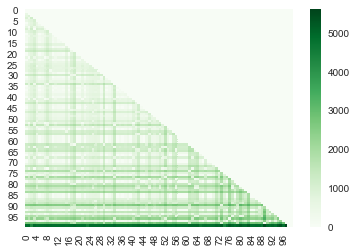

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

ax = sns.heatmap(a, cmap="Greens")
ax

Provide an interpretation of the heatmap's results. **(1 pts)**

If a pixel's color in the heatmap is more dark, it means this two users(their axies are crossed) are more dissimilarity, and vice versa.


-----------------